In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape, Dense, Conv2D, BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [3]:
train_path = './cnn/pneumonia_revamped/chest_xray/train'
test_path = './cnn/pneumonia_revamped/chest_xray/test/'
valid_path = './cnn/pneumonia_revamped/chest_xray/val/'

In [4]:
batch_size = 48

img_height = 150
img_width = 150

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale=1./255,zoom_range=0.4,shear_range=0.3,horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [6]:
train = image_gen.flow_from_directory(train_path,target_size=(img_height,img_width),class_mode='binary',batch_size=batch_size)
test = test_data_gen.flow_from_directory(test_path,target_size=(img_height,img_width),shuffle=False,class_mode='binary',batch_size=batch_size)
valid = test_data_gen.flow_from_directory(valid_path,target_size=(img_height,img_width),class_mode='binary',batch_size=batch_size)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


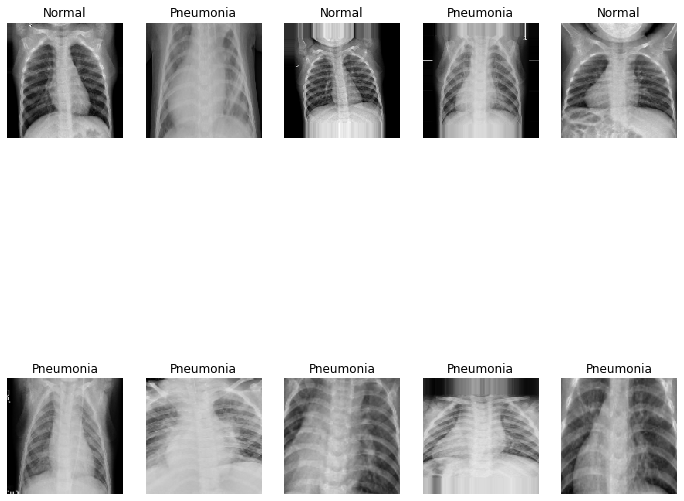

In [7]:
plt.figure(figsize=(12,12))
for i in range(0,10):
  plt.subplot(2,5,i+1)
  for X_batch,Y_batch in train:
    image = X_batch[0]
    dic = {0:'Normal',1:'Pneumonia'}
    plt.title(dic.get(Y_batch[0]))
    plt.axis('off')

    plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
    break

    plt.tight_layout()
    plt.show()

In [8]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(img_width,img_height,3),kernel_initializer='he_normal'))
model.add(keras.layers.ELU())
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),kernel_initializer='he_normal'))
model.add(keras.layers.ELU())
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),kernel_initializer='he_normal'))
model.add(keras.layers.ELU())
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),kernel_initializer='he_normal'))
model.add(keras.layers.ELU())
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),kernel_initializer='he_normal'))
model.add(keras.layers.ELU())
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),kernel_initializer='he_normal'))
model.add(keras.layers.ELU())
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),kernel_initializer='he_normal'))
model.add(keras.layers.ELU())
model.add(BatchNormalization())

model.add(Conv2D(256,(3,3),kernel_initializer='he_normal'))
model.add(keras.layers.ELU())
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))

model.add(keras.layers.ELU())

model.add(BatchNormalization())

model.add(Dropout(0.75))

model.add(Dense(activation='sigmoid',units=1))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
elu (ELU)                    (None, 148, 148, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
elu_1 (ELU)                  (None, 146, 146, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True,rankdir='TB',expand_nested=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [11]:
early = EarlyStopping(monitor="val_loss",mode="min",patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1,factor=0.3,min_lr=0.000001)
callbacks_list = [early,learning_rate_reduction]

In [12]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced',np.unique(train.classes),train.classes)
cw = dict(zip(np.unique(train.classes),weights))
print(cw)

{0: 1.9448173005219984, 1: 0.6730322580645162}


C:\Users\vishw\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [17]:
model.fit(train,epochs=6,validation_data=valid,class_weight=cw,batch_size=512,callbacks=callbacks_list)

Epoch 1/6
109/109 [==============================] - 74s 677ms/step - loss: 0.1714 - accuracy: 0.9369 - val_loss: 2.3401 - val_accuracy: 0.5000 - lr: 3.0000e-04
Epoch 2/6
109/109 [==============================] - 74s 675ms/step - loss: 0.1589 - accuracy: 0.9419 - val_loss: 1.0218 - val_accuracy: 0.5625 - lr: 3.0000e-04
Epoch 3/6
109/109 [==============================] - 75s 690ms/step - loss: 0.1428 - accuracy: 0.9488 - val_loss: 1.0949 - val_accuracy: 0.5625 - lr: 3.0000e-04
Epoch 4/6
109/109 [==============================] - 79s 728ms/step - loss: 0.1498 - accuracy: 0.9479 - val_loss: 0.5626 - val_accuracy: 0.6250 - lr: 3.0000e-04
Epoch 5/6
109/109 [==============================] - 81s 743ms/step - loss: 0.1390 - accuracy: 0.9515 - val_loss: 0.3627 - val_accuracy: 0.8750 - lr: 3.0000e-04
Epoch 6/6
109/109 [==============================] - 76s 700ms/step - loss: 0.1443 - accuracy: 0.9479 - val_loss: 0.3806 - val_accuracy: 0.8125 - lr: 3.0000e-04


## Evaluate

In [18]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score, log_loss

In [19]:
y_bar = np.round(model.predict(test)).reshape(-1)
y_act = test.labels

In [20]:
##accuracy
print("Accuracy: ",accuracy_score(y_bar,y_act))
##Roc_Auc Score
print("ROC-AUC score: ",roc_auc_score(y_bar,y_act))
##F1-Score Score
print("F1 score: ",f1_score(y_bar,y_act))
##Log Loss Score
print("Log Loss: ",log_loss(y_bar,y_act))

Accuracy:  0.9230769230769231
ROC-AUC score:  0.9290865384615384
F1 score:  0.9404466501240696
Log Loss:  2.6568430489221884
